In [3]:
#Titanic dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
#For inline plots in jupyter notebook
%matplotlib inline

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


In [9]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#3 data cleaning 
#Handle missing values 
print("Missing values before cleaning :")
print(df.isnull().sum())

Missing values before cleaning :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
#fill age with median value --
df['Age'] = df['Age'].fillna(df['Age'].median())


In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [17]:
#fill embarked with mode 
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode())

In [91]:
#drop cabin
df.drop("Cabin",axis=1,inplace=True)

In [19]:
#remove duplicates
print("\n Duplicates rows:",df.duplicated().sum())
df.drop_duplicates(inplace=True)


 Duplicates rows: 0


In [21]:
#handle outliers uding IQR for age 
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['Age']>=lower_bound) & (df['Age'] <=upper_bound)]

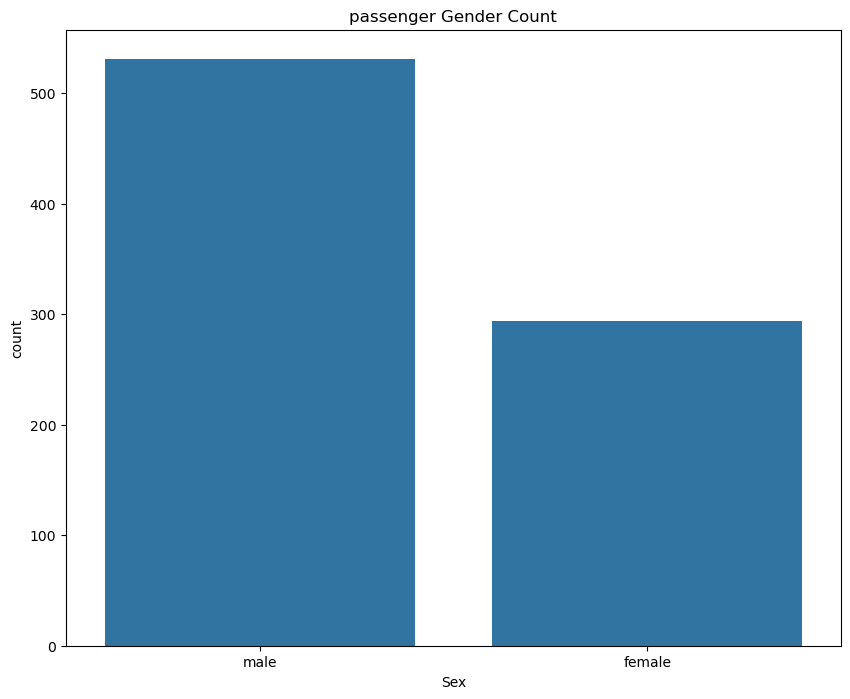

In [23]:
#Visualizations 
#Bar charts
plt.figure(figsize=(10,8))
sns.countplot(x='Sex',data=df)
plt.title("passenger Gender Count")
plt.show()

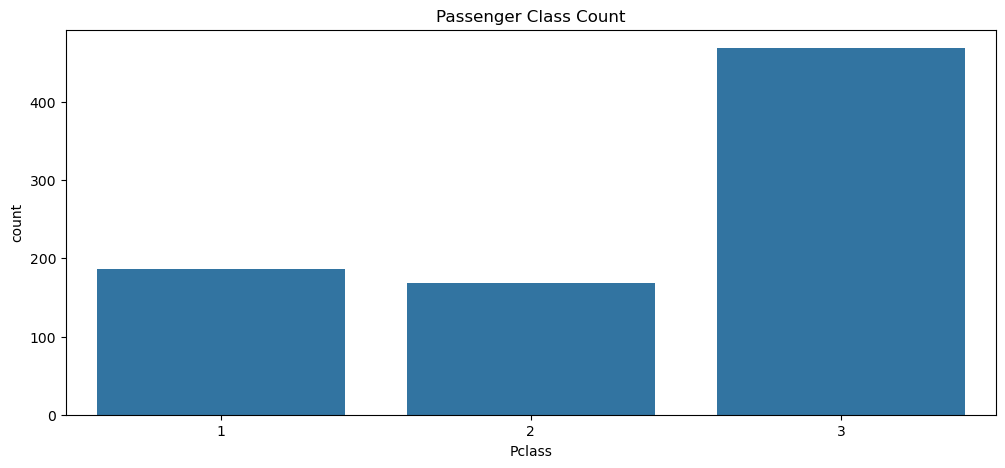

In [25]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.show()

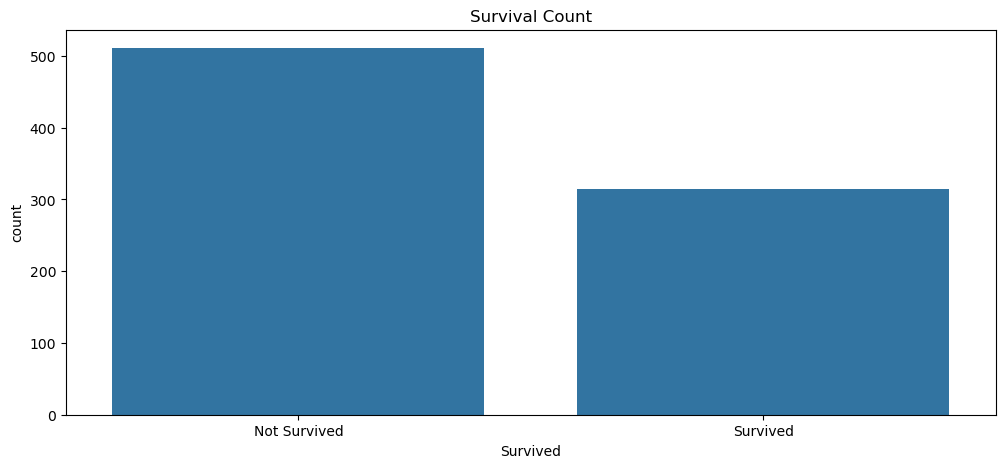

In [27]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

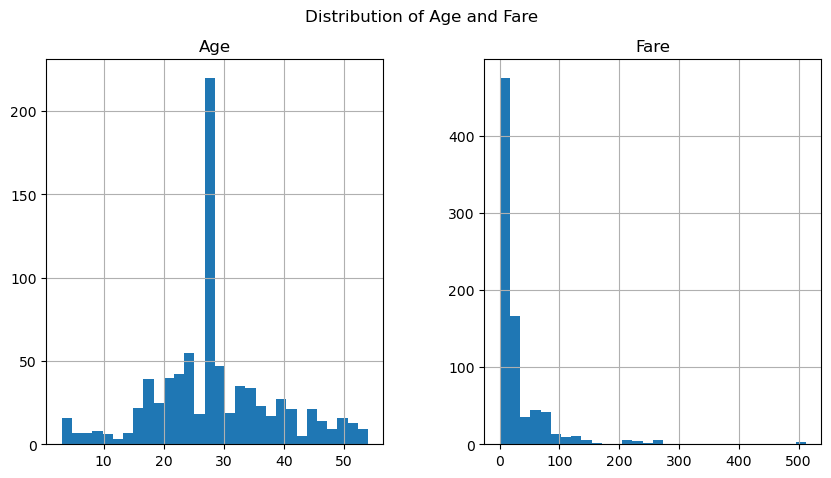

In [29]:
# 4.2 Histograms for numerical variables
df[['Age', 'Fare']].hist(bins=30, figsize=(10, 5))
plt.suptitle('Distribution of Age and Fare')
plt.show()

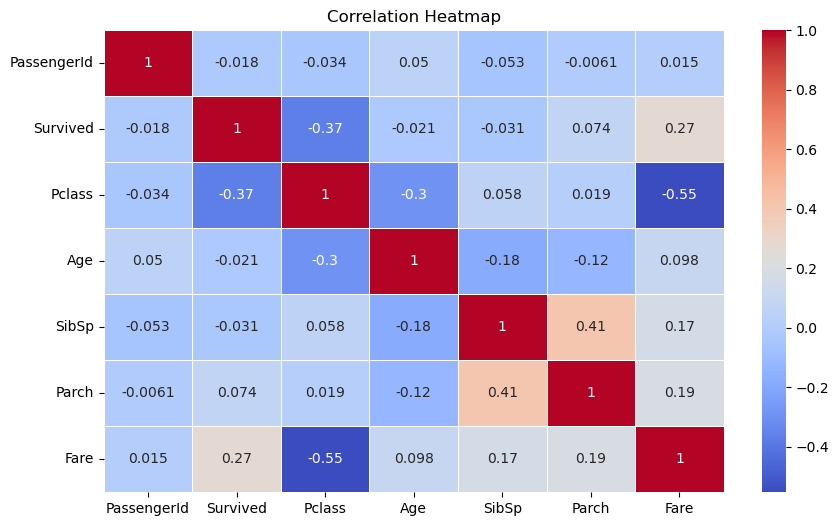

In [31]:
# 4.3 Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
# 5. Summarize Insights
print("\n🔍 Insights:")
print("""
1. Most passengers are in the 3rd class and are male.
2. Survival rate is higher for females and first-class passengers.
3. Age and Fare contain outliers; Age has been cleaned using IQR.
4. Strong positive correlation between Fare and Pclass.
5. 'Sex', 'Pclass', and 'Fare' appear to have a significant impact on survival.
""")


🔍 Insights:

1. Most passengers are in the 3rd class and are male.
2. Survival rate is higher for females and first-class passengers.
3. Age and Fare contain outliers; Age has been cleaned using IQR.
4. Strong positive correlation between Fare and Pclass.
5. 'Sex', 'Pclass', and 'Fare' appear to have a significant impact on survival.

